# Ames Housing - data preparation

## Libriares import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## RAW Data import

In [2]:
df = pd.read_csv('DATA/ames.csv')

In [3]:
df.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df = df.drop(['Order','PID'],axis=1)

In [5]:
#df.info()

## Finding outliers

In [6]:
df.corr()['SalePrice'].sort_values(ascending=False)[:10]

SalePrice         1.000000
Overall.Qual      0.799262
Gr.Liv.Area       0.706780
Garage.Cars       0.647877
Garage.Area       0.640401
Total.Bsmt.SF     0.632280
X1st.Flr.SF       0.621676
Year.Built        0.558426
Full.Bath         0.545604
Year.Remod.Add    0.532974
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='Overall.Qual', ylabel='SalePrice'>

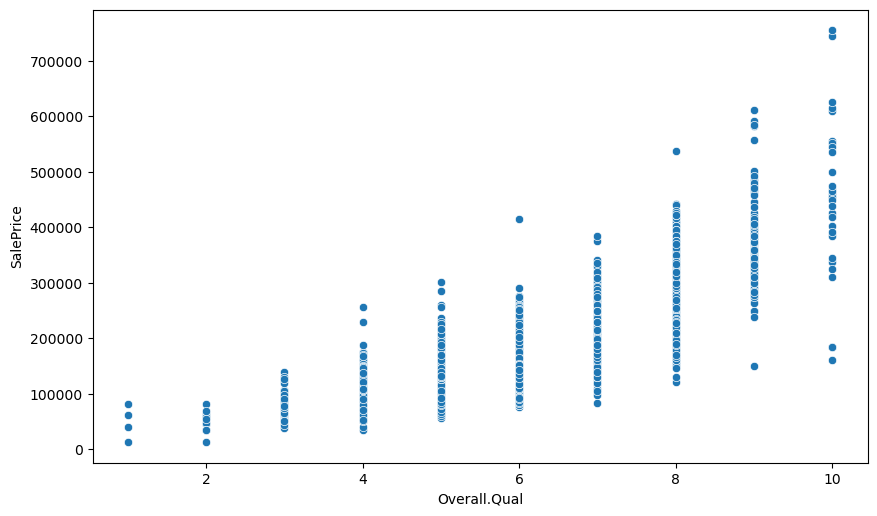

In [7]:
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(x='Overall.Qual', y='SalePrice', data=df)

<AxesSubplot:xlabel='Gr.Liv.Area', ylabel='SalePrice'>

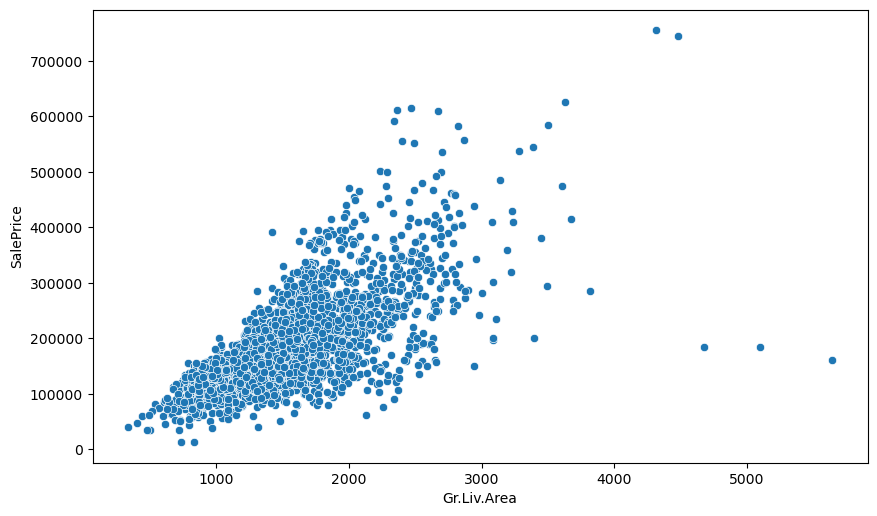

In [8]:
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(x='Gr.Liv.Area', y='SalePrice', data=df)

In [9]:
df[(df['Overall.Qual'] > 8) & (df['SalePrice'] < 200000)]

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1182,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [10]:
drop_id = df[(df['Overall.Qual'] > 8) & (df['SalePrice'] < 200000)].index

In [11]:
drop_id

Int64Index([1182, 1498, 2180, 2181], dtype='int64')

In [12]:
df = df.drop(drop_id, axis=0)

<AxesSubplot:xlabel='Gr.Liv.Area', ylabel='SalePrice'>

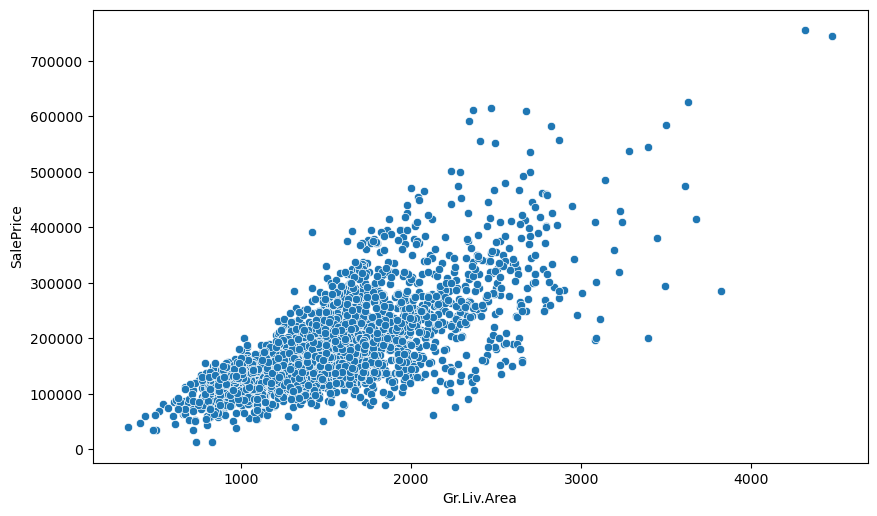

In [13]:
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(x='Gr.Liv.Area', y='SalePrice', data=df)

In [14]:
df.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [15]:
df.to_csv('DATA/ames_outlieres_removed.csv', index=False)

## Missing data

In [16]:
df = pd.read_csv('DATA/ames_outlieres_removed.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2926 non-null   int64  
 1   MS.Zoning        2926 non-null   object 
 2   Lot.Frontage     2437 non-null   float64
 3   Lot.Area         2926 non-null   int64  
 4   Street           2926 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot.Shape        2926 non-null   object 
 7   Land.Contour     2926 non-null   object 
 8   Utilities        2926 non-null   object 
 9   Lot.Config       2926 non-null   object 
 10  Land.Slope       2926 non-null   object 
 11  Neighborhood     2926 non-null   object 
 12  Condition.1      2926 non-null   object 
 13  Condition.2      2926 non-null   object 
 14  Bldg.Type        2926 non-null   object 
 15  House.Style      2926 non-null   object 
 16  Overall.Qual     2926 non-null   int64  
 17  Overall.Cond  

In [18]:
df.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Percentage of missing values

In [19]:
#function definition
def missing_data (df):
    percent_nan = df.isnull().sum()/len(df)*100
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [20]:
percent_nan = missing_data(df)

In [21]:
percent_nan

Electrical         0.034176
Garage.Area        0.034176
Total.Bsmt.SF      0.034176
Bsmt.Unf.SF        0.034176
BsmtFin.SF.1       0.034176
BsmtFin.SF.2       0.034176
Garage.Cars        0.034176
Bsmt.Full.Bath     0.068353
Bsmt.Half.Bath     0.068353
Mas.Vnr.Area       0.786056
Mas.Vnr.Type       0.786056
BsmtFin.Type.1     2.734108
Bsmt.Qual          2.734108
Bsmt.Cond          2.734108
BsmtFin.Type.2     2.768284
Bsmt.Exposure      2.836637
Garage.Type        5.365687
Garage.Finish      5.434040
Garage.Qual        5.434040
Garage.Cond        5.434040
Garage.Yr.Blt      5.434040
Lot.Frontage      16.712235
Fireplace.Qu      48.598770
Fence             80.451128
Alley             93.233083
Misc.Feature      96.411483
Pool.QC           99.589884
dtype: float64

(0.0, 1.0)

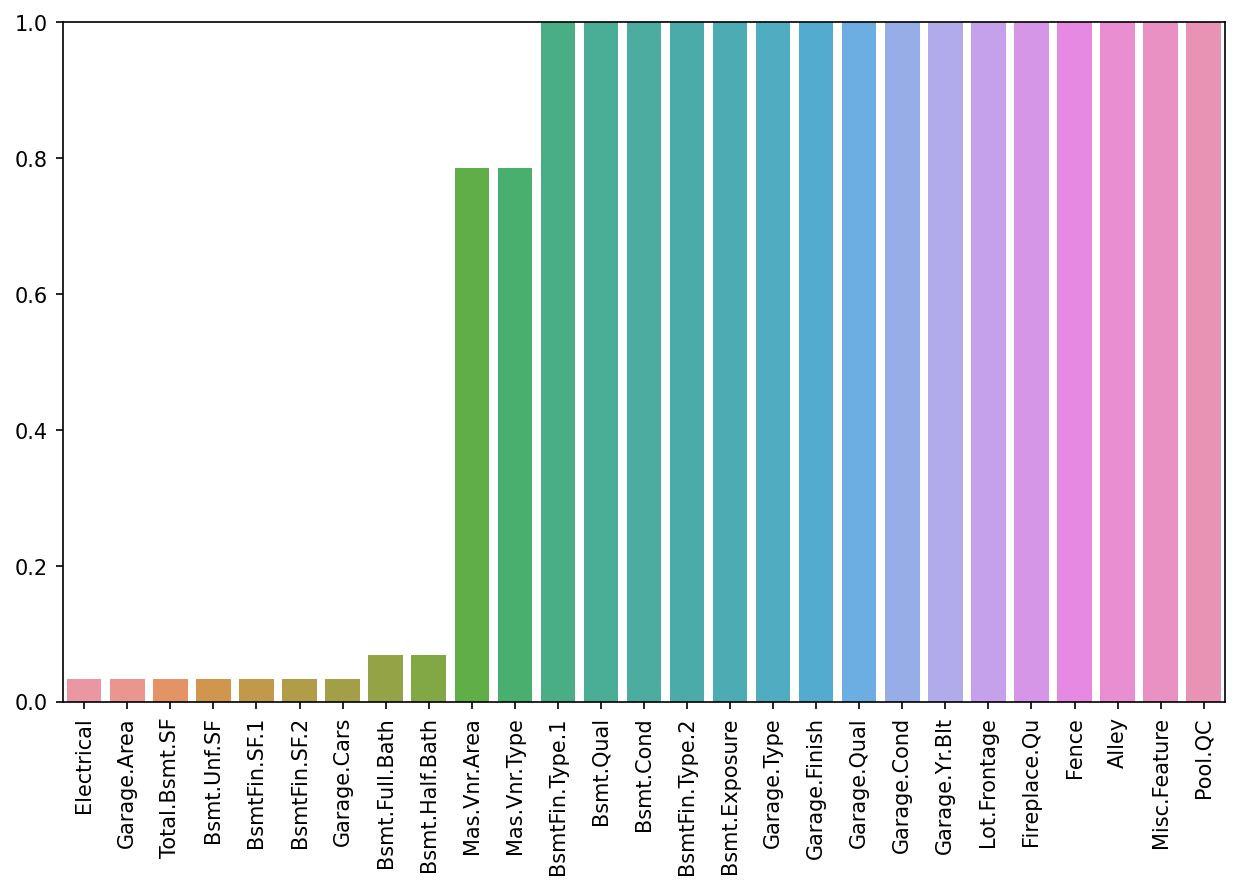

In [22]:
plt.figure(figsize=(10,6),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [23]:
df['Mas.Vnr.Type'] = df['Mas.Vnr.Type'].fillna('None')
df['Mas.Vnr.Area'] = df['Mas.Vnr.Area'].fillna(0)

In [24]:
percent_nan = missing_data(df)

In [25]:
percent_nan[percent_nan < 1]

Bsmt.Unf.SF       0.034176
Garage.Area       0.034176
Electrical        0.034176
Total.Bsmt.SF     0.034176
BsmtFin.SF.2      0.034176
BsmtFin.SF.1      0.034176
Garage.Cars       0.034176
Bsmt.Half.Bath    0.068353
Bsmt.Full.Bath    0.068353
dtype: float64

(0.0, 1.0)

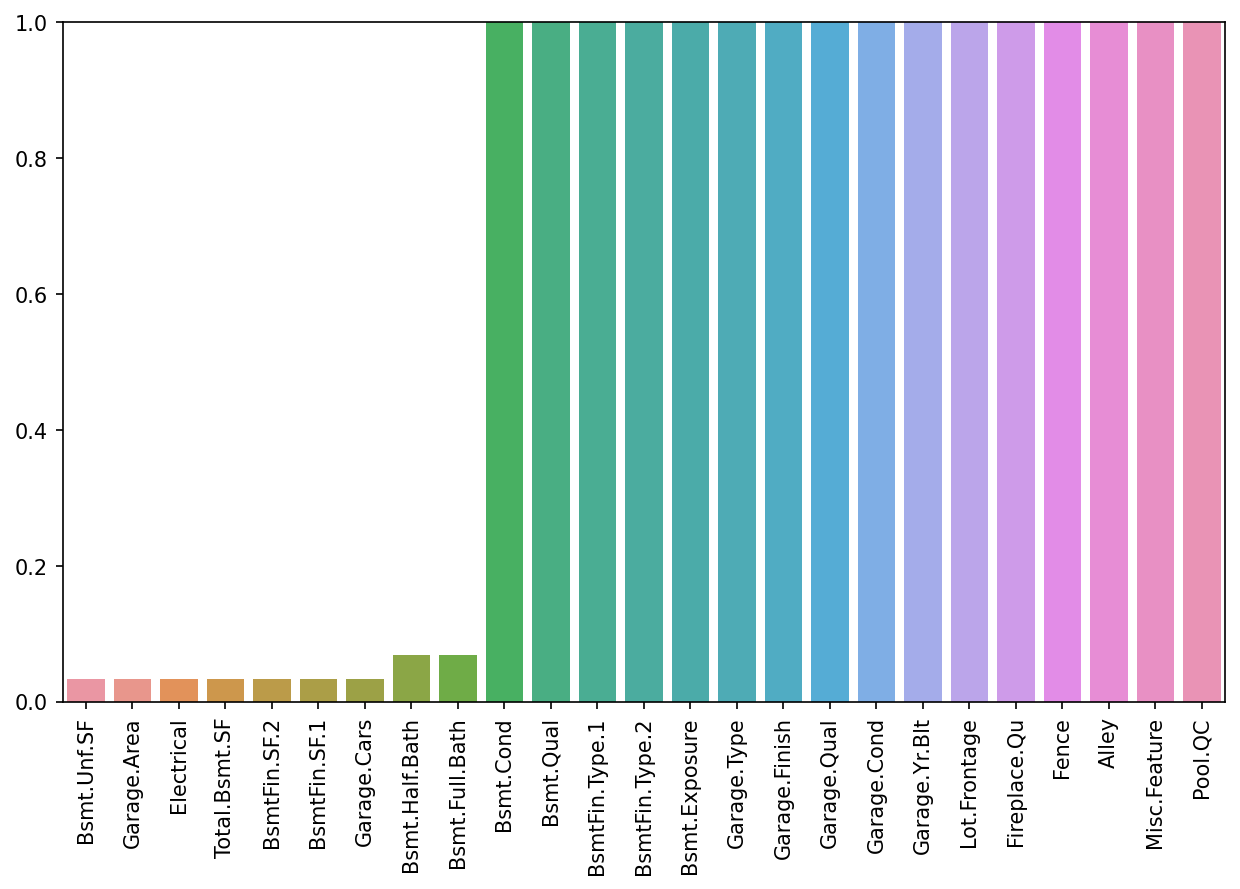

In [26]:
plt.figure(figsize=(10,6),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [27]:
rows_to_drop = percent_nan[percent_nan < 1].index

In [28]:
df = df.dropna(axis=0,subset=rows_to_drop)

In [29]:
percent_nan = missing_data(df)

In [30]:
percent_nan[percent_nan < 1]

Series([], dtype: float64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Bsmt.Qual'),
  Text(1, 0, 'Bsmt.Cond'),
  Text(2, 0, 'BsmtFin.Type.1'),
  Text(3, 0, 'BsmtFin.Type.2'),
  Text(4, 0, 'Bsmt.Exposure'),
  Text(5, 0, 'Garage.Type'),
  Text(6, 0, 'Garage.Yr.Blt'),
  Text(7, 0, 'Garage.Finish'),
  Text(8, 0, 'Garage.Qual'),
  Text(9, 0, 'Garage.Cond'),
  Text(10, 0, 'Lot.Frontage'),
  Text(11, 0, 'Fireplace.Qu'),
  Text(12, 0, 'Fence'),
  Text(13, 0, 'Alley'),
  Text(14, 0, 'Misc.Feature'),
  Text(15, 0, 'Pool.QC')])

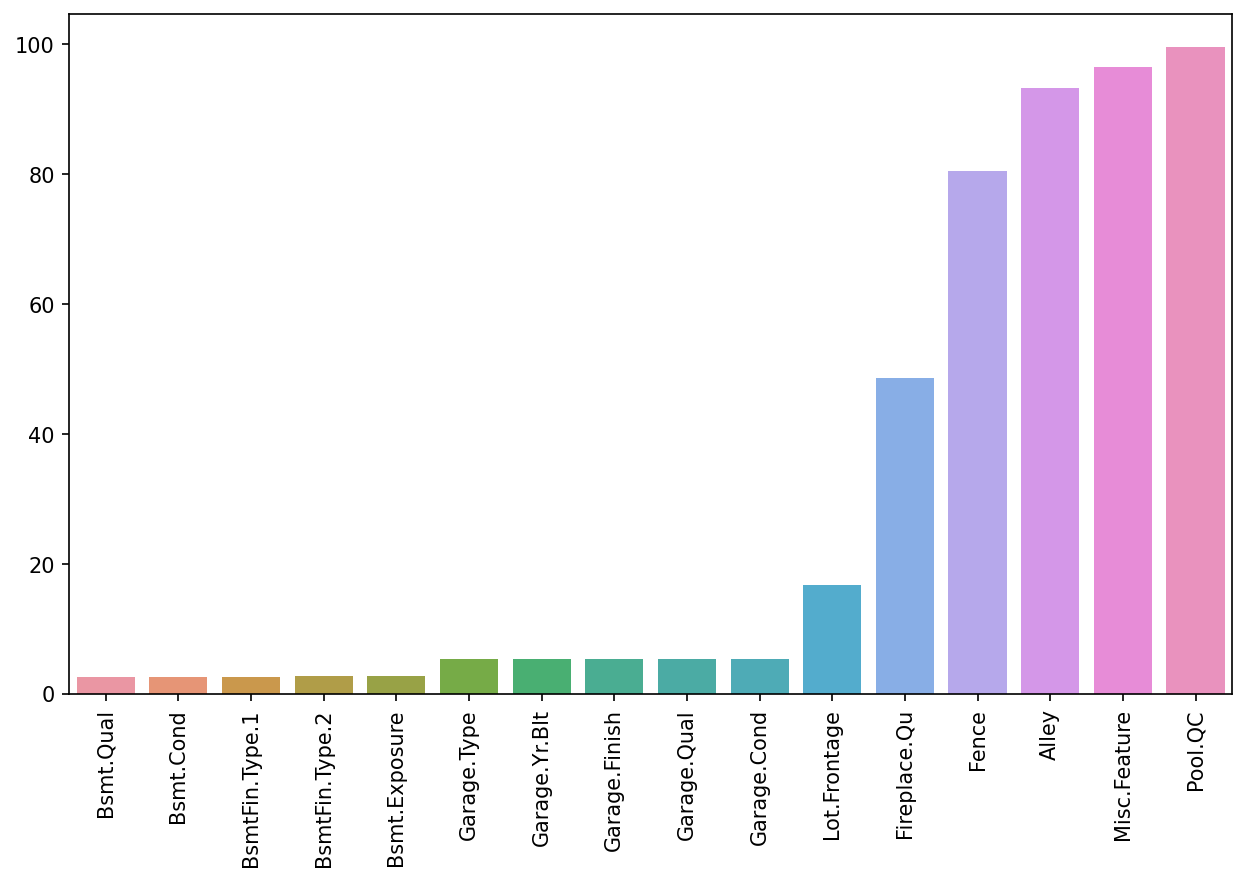

In [31]:
plt.figure(figsize=(10,6),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
#plt.ylim(0,1)

In [32]:
# BSMT string columns

bsmt_str_cols = ['Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

#Garage
gar_str_cols = ['Garage.Type', 'Garage.Finish', 'Garage.Qual', 'Garage.Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

df['Garage.Yr.Blt'] = df['Garage.Yr.Blt'].fillna(0)

In [33]:
percent_nan = missing_data(df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot.Frontage'),
  Text(1, 0, 'Fireplace.Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc.Feature'),
  Text(5, 0, 'Pool.QC')])

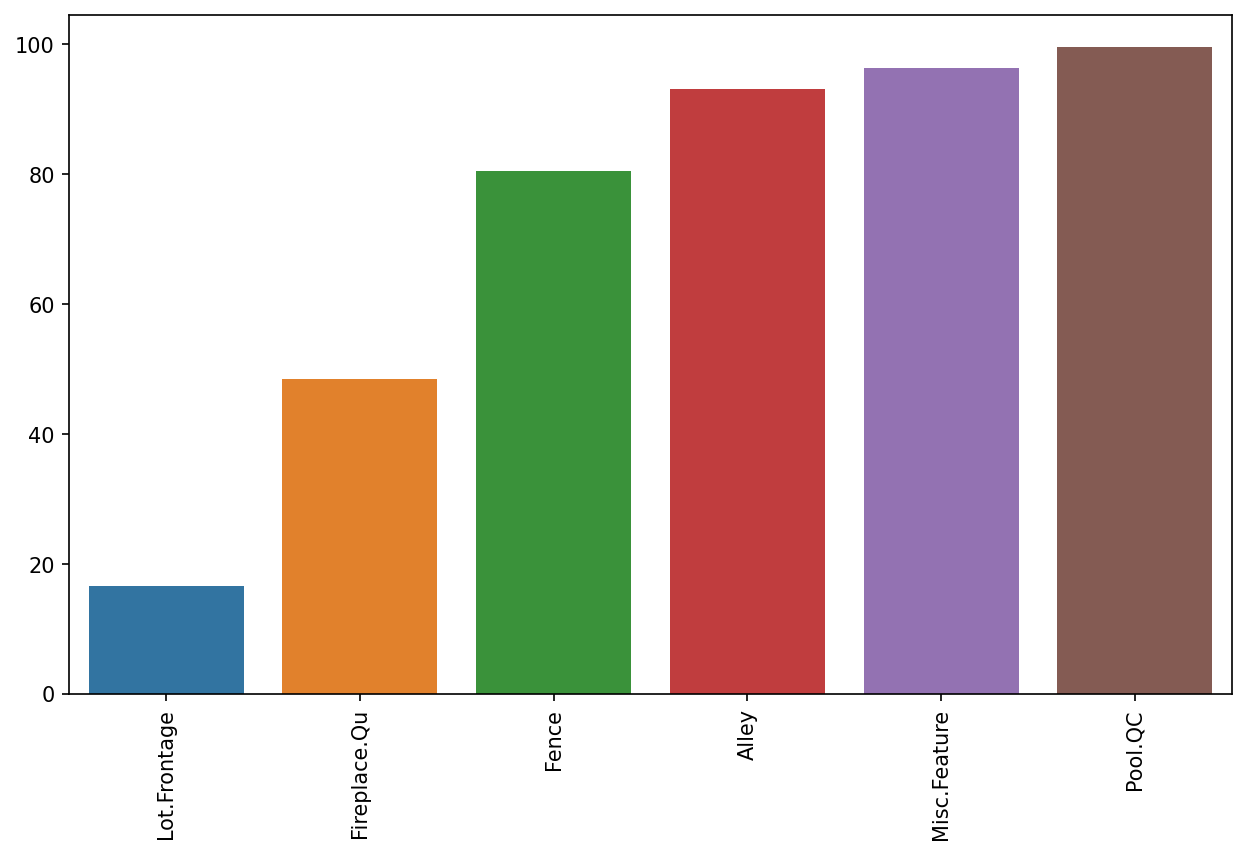

In [34]:
plt.figure(figsize=(10,6),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
#plt.ylim(0,1)

In [35]:
#dropping whole columns
df = df.drop(['Pool.QC','Misc.Feature','Alley','Fence'],axis=1)

In [36]:
percent_nan = missing_data(df)

(array([0, 1]), [Text(0, 0, 'Lot.Frontage'), Text(1, 0, 'Fireplace.Qu')])

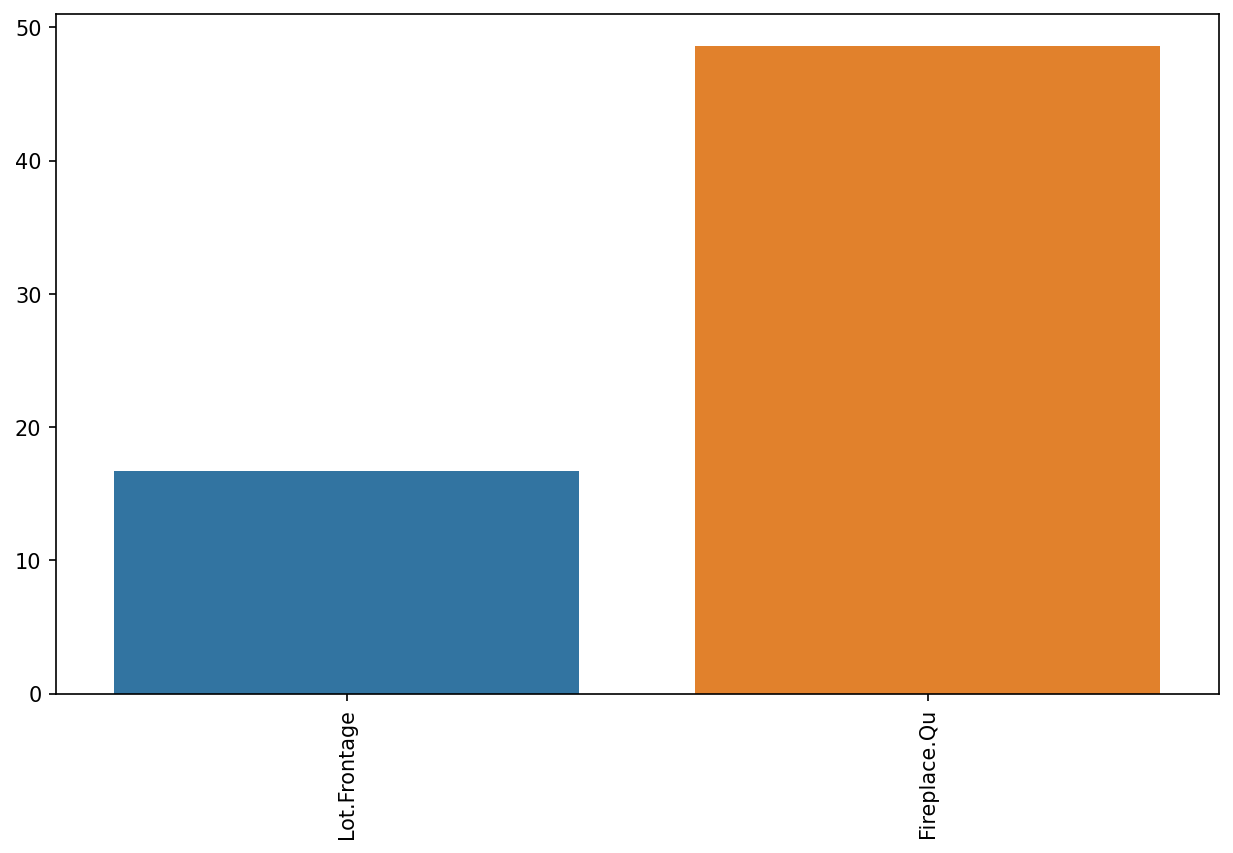

In [37]:
plt.figure(figsize=(10,6),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [38]:
df['Fireplace.Qu'].value_counts()

Gd    739
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace.Qu, dtype: int64

In [39]:
df['Fireplace.Qu']=df['Fireplace.Qu'].fillna('None')

In [40]:
#Estimating Lot.Frontage based od Neighborhoods

<AxesSubplot:xlabel='Lot.Frontage', ylabel='Neighborhood'>

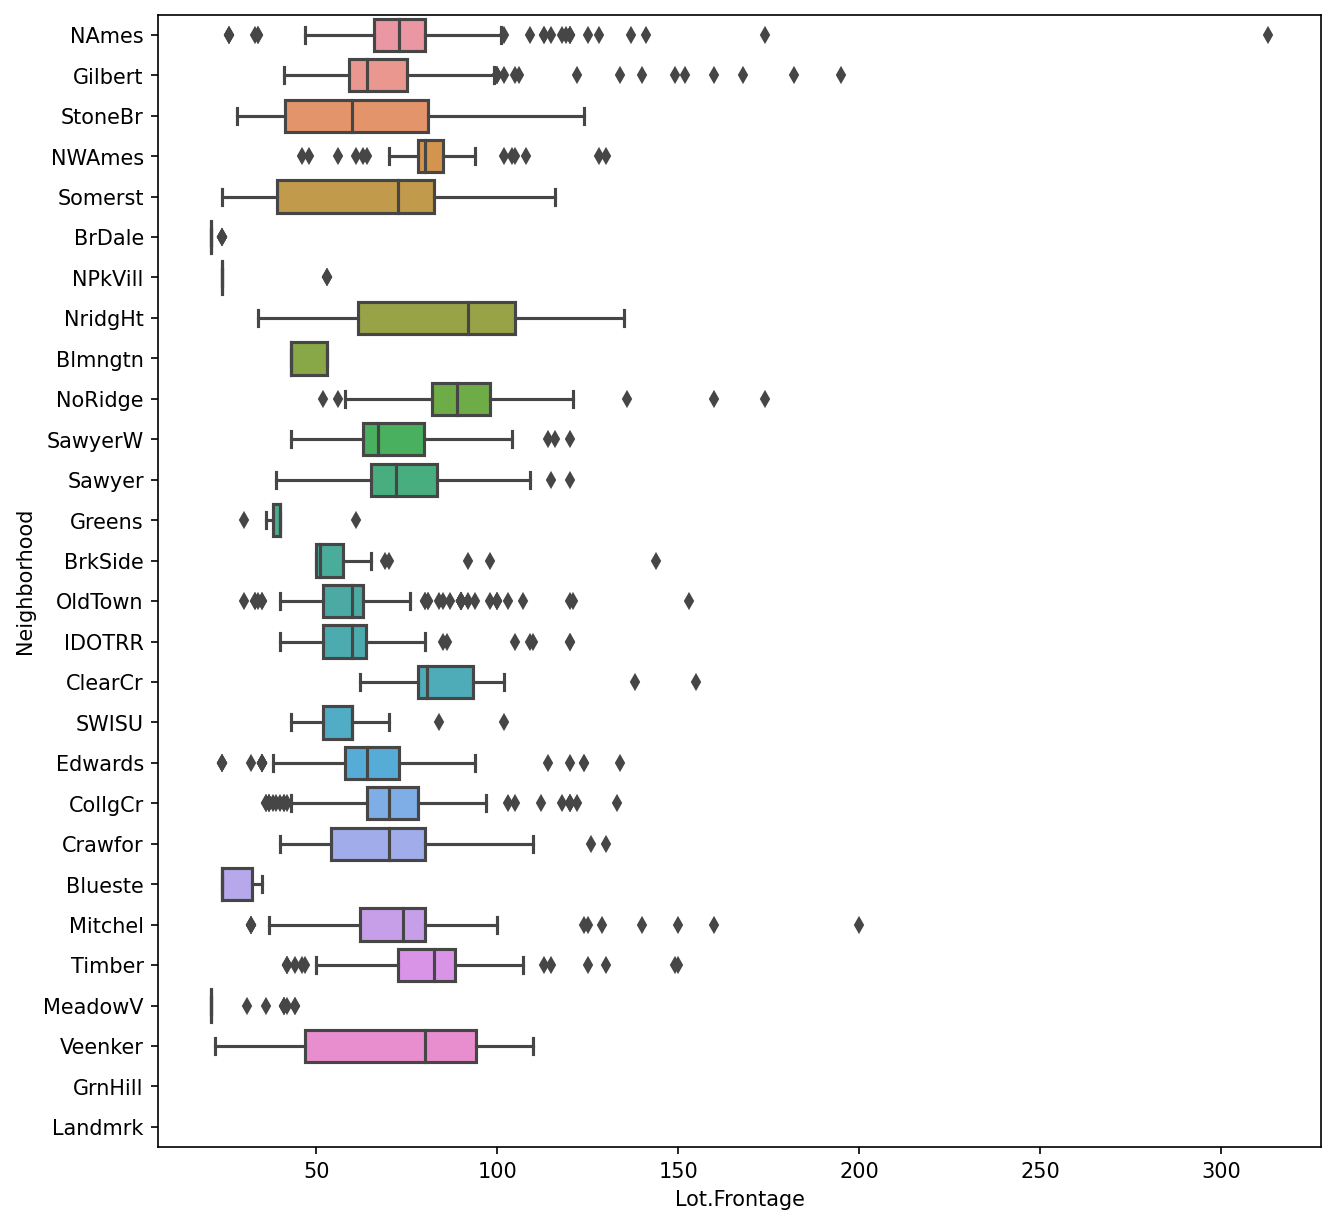

In [41]:
plt.figure(figsize=(10,10),dpi=150)
sns.boxplot(x='Lot.Frontage',y='Neighborhood',data=df,orient='h')

In [42]:
df.groupby('Neighborhood')['Lot.Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.329787
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.459770
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot.Frontage, dtype: float64

In [43]:
df['Lot.Frontage'] = df.groupby('Neighborhood')['Lot.Frontage'].transform(lambda value: value.fillna(value.mean()))

In [44]:
df['Lot.Frontage'] = df['Lot.Frontage'].fillna(0)

In [45]:
percent_nan = missing_data(df)

In [46]:
percent_nan

Series([], dtype: float64)

In [47]:
#No missing data

In [48]:
df.to_csv('DATA/ames_no_missing_data.csv', index=False)

## Encoding data

In [49]:
df = pd.read_csv('DATA/ames_no_missing_data.csv')

In [50]:
df.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,...,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [55]:
df['MS.SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2917    80
2918    20
2919    85
2920    20
2921    60
Name: MS.SubClass, Length: 2922, dtype: int64

In [56]:
# MS.SubClass conversion to string
df['MS.SubClass'] = df['MS.SubClass'].apply(str)

In [57]:
# data frame split for numeric and object types
my_numeric_df = df.select_dtypes(exclude='object')
my_object_df = df.select_dtypes(include='object')

In [58]:
df_object_dummies = pd.get_dummies(my_object_df,drop_first=True)

In [60]:
df_object_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Columns: 238 entries, MS.SubClass_150 to Sale.Condition_Partial
dtypes: uint8(238)
memory usage: 679.3 KB


In [62]:
final_df = pd.concat([my_numeric_df,df_object_dummies],axis=1)

In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Columns: 274 entries, Lot.Frontage to Sale.Condition_Partial
dtypes: float64(11), int64(25), uint8(238)
memory usage: 1.5 MB


In [64]:
final_df.head()

,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,...,Sale.Type_ConLw,Sale.Type_New,Sale.Type_Oth,Sale.Type_VWD,Sale.Type_WD,Sale.Condition_AdjLand,Sale.Condition_Alloca,Sale.Condition_Family,Sale.Condition_Normal,Sale.Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [65]:
final_df.to_csv('DATA/ames_final_processed.csv', index=False)